In [146]:
import numpy as np
import netCDF4
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os

In [93]:
nc_dswrf = netCDF4.Dataset('dswrf.sfc.gauss.2020.nc.nc4','r')
print(nc_dswrf.variables.keys())
print(nc_dswrf.variables['dswrf'][:10,0,0]) #(time,lat,lon)
print(nc_dswrf.variables['time']) #hours since 1800-1-1 00:00:0.0
nc_dlwrf = netCDF4.Dataset('dlwrf.sfc.gauss.2020.nc.nc4','r')
print(nc_dlwrf.variables.keys())
print(nc_dlwrf.variables['dlwrf'][:10,0,0]) #(time,lat,lon)
print(nc_dlwrf.variables['time']) #hours since 1800-1-1 00:00:0.0
ncep_dswrf = nc_dswrf.variables['dswrf'][:,:,:]
ncep_dlwrf = nc_dlwrf.variables['dlwrf'][:,:,:]

lat = nc_dswrf.variables['lat'][:]
lon = nc_dswrf.variables['lon'][:]
lat_l =nc_dlwrf.variables['lat'][:]
lon_l = nc_dlwrf.variables['lon'][:]

t = nc_dswrf.variables['time'][:]
date = []
date_0 = datetime.datetime(year=1800, month=1, day=1,hour=0)
for i in range(len(t)):
    td = datetime.timedelta(hours = t[i])
    date.append(date_0+td)
print(date[:5])
nc_dswrf.close()
nc_dlwrf.close()

dict_keys(['lon', 'time', 'lat', 'dswrf'])
[183.69995   31.         0.         0.       182.3999    31.699951
   0.         0.       177.69995   31.399902]
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: hours since 1800-1-1 00:00:0.0
    long_name: Time
    delta_t: 0000-00-00 06:00:00
    avg_period: 0000-00-00 06:00:00
    standard_name: time
    axis: T
    bounds: time_bnds
    coordinate_defines: start
    actual_range: [1928472. 1937250.]
    calendar: gregorian
unlimited dimensions: 
current shape = (1464,)
filling on, default _FillValue of 9.969209968386869e+36 used
dict_keys(['lon', 'time', 'lat', 'dlwrf'])
[185.30005 223.80005 233.8999  245.19995 248.      263.19995 219.19995
 224.69995 242.19995 276.80005]
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: hours since 1800-1-1 00:00:0.0
    long_name: Time
    delta_t: 0000-00-00 06:00:00
    avg_period: 0000-00-00 06:00:00
    standard_name: time
    axis: T
    bounds: time_bnds
    coordi

In [113]:
#find
lon_0,lat_0 =[140.8008,36.8003]
for i in range(len(lon)):
    if lon[i] >lon_0:
        imin = i-1
        imax = i
        break
for j in range(len(lat)):
    print(lat[j])
    if lat[j] <lat_0:
        jmin = j
        jmax = j-1
        break
print(lon[imin],lon[imax],lat[jmin],lat[jmax])
dswrf_ncep_merged = np.zeros(len(t))
for i in range(len(t)):
    dx = (ncep_dswrf[i,jmin,imax] - ncep_dswrf[i,jmin,imin])/(imax-imin)
    dy = (ncep_dswrf[i,jmax,imin] - ncep_dswrf[i,jmin,imin])/(jmax-jmin)
    dswrf_ncep_merged[i] = ncep_dswrf[i,jmin,imin] + dx*(lon_0-imin) + dy*(lat_0-jmin)
    
    
lon_0,lat_0 =[140.8008,36.8003]
for i in range(len(lon_l)):
    if lon_l[i] >lon_0:
        imin = i-1
        imax = i
        break
for j in range(len(lat_l)):
    if lat_l[j] <lat_0:
        jmin = j
        jmax = j-1
        break
print(lon_l[imin],lon_l[imax],lat_l[jmin],lat_l[jmax])
dlwrf_ncep_merged = np.zeros(len(t))
for i in range(len(t)):
    dlwrf_ncep_merged[i] = (ncep_dlwrf[i,jmin,imin]+ncep_dlwrf[i,jmin,imax]+ \
                            ncep_dlwrf[i,jmax,imin]+ncep_dlwrf[i,jmax,imax])/4
    

               

50.4752
48.5705
46.6658
44.7611
42.8564
40.9517
39.047
37.1422
35.2375
140.625 142.5 35.2375 37.1422
140.625 142.5 35.2375 37.1422


In [114]:
gwo_dlwrf_f = '../dswr/scr/Chiba_2020_dlwrf.csv'
gwo_dlwrf = pd.read_csv(gwo_dlwrf_f,names=['datetime','dlwrf'],skiprows =1)
print(gwo_dlwrf.head())
gwo_dswrf_f = '../dswr/scr/Chiba_2020_dswrf.csv'
gwo_dswrf = pd.read_csv(gwo_dswrf_f,names=['datetime','dswrf'],skiprows =1)
print(gwo_dswrf.head())
date_gwo = []
for i in range(len(gwo_dswrf)):
    date_gwo.append(datetime.datetime.strptime(gwo_dswrf.iat[i,0], '%Y-%m-%dT%H:%M:%S'))
print(type(gwo_dswrf['datetime'][0]))

              datetime       dlwrf
0  2020-01-01T01:00:00  219.444444
1  2020-01-01T02:00:00  222.222222
2  2020-01-01T03:00:00  222.222222
3  2020-01-01T04:00:00  233.333333
4  2020-01-01T05:00:00  288.888889
              datetime  dswrf
0  2020-01-01T01:00:00    0.0
1  2020-01-01T02:00:00    0.0
2  2020-01-01T03:00:00    0.0
3  2020-01-01T04:00:00    0.0
4  2020-01-01T05:00:00    0.0
<class 'str'>


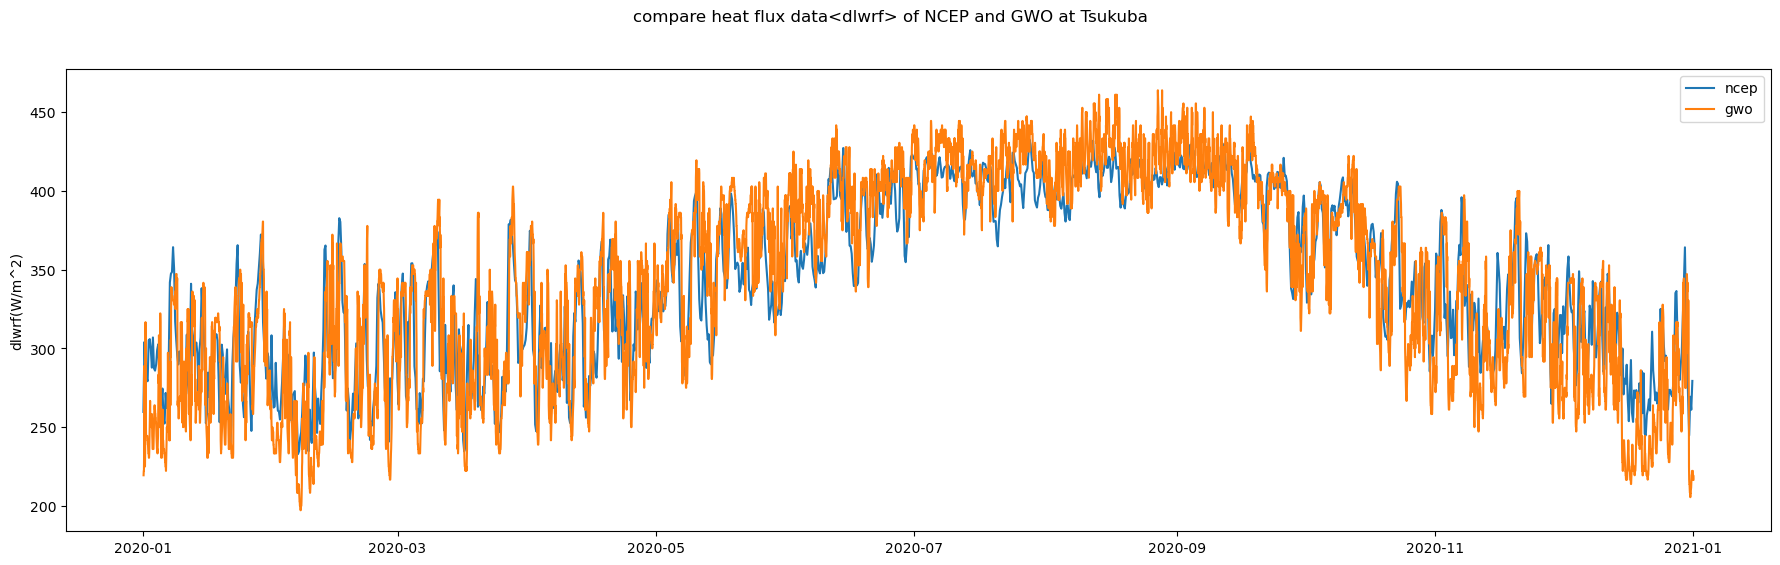

In [115]:
fig = plt.figure(figsize=(22,6))
ax =fig.add_subplot(1,1,1,ylabel='dlwrf(W/m^2)')
ax.plot(date,dlwrf_ncep_merged,label='ncep')
ax.plot(date_gwo,gwo_dlwrf['dlwrf'],label='gwo')
fig.suptitle('compare heat flux data<dlwrf> of NCEP and GWO at Tsukuba')
ax.legend()
plt.plot()
plt.show()

In [99]:
def calc_cc(x,y):
    s1 = pd.Series(x)
    s2 = pd.Series(y)
   # print(s1,s2)
    res = s2.corr(s1)
    return res
calc_cc(dlwrf_ncep_merged,gwo_dlwrf['dlwrf'])

-0.09881514354400374

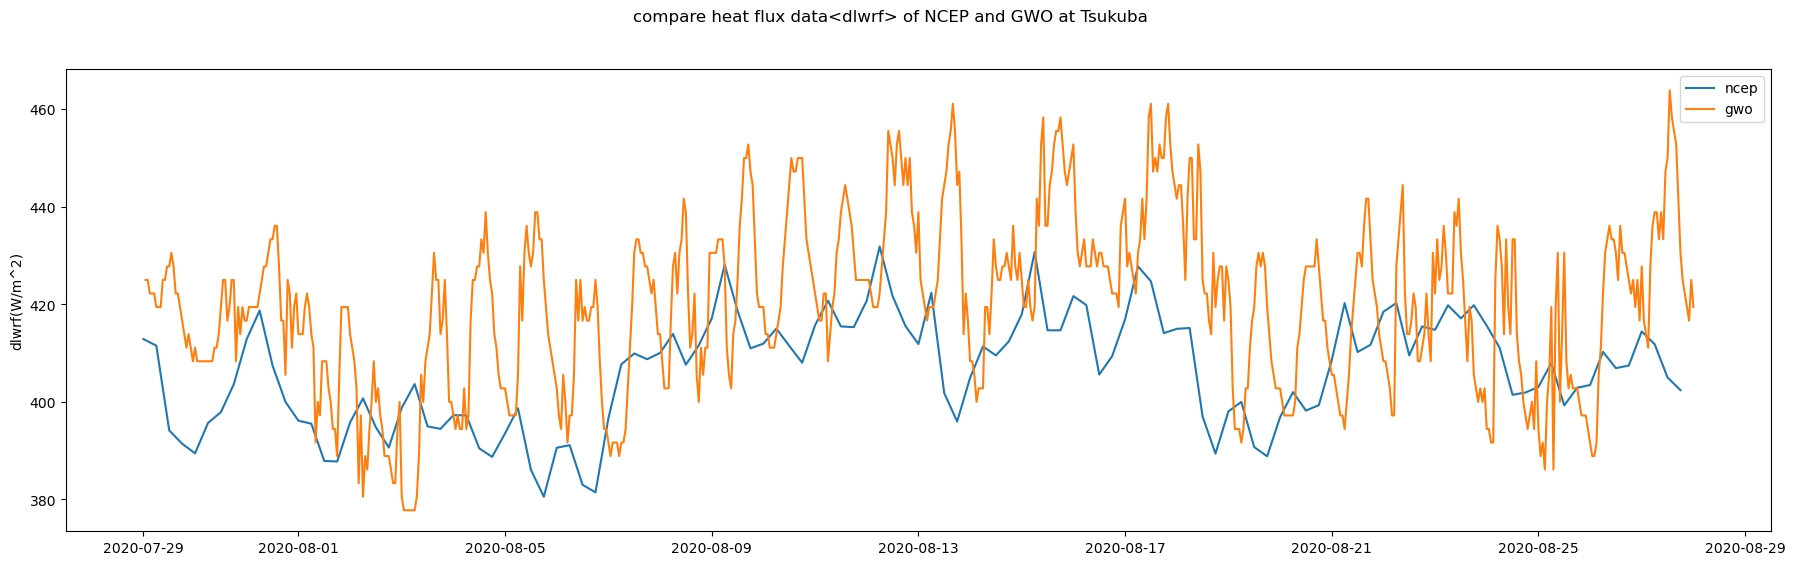

In [117]:
fig = plt.figure(figsize=(22,6))
ax =fig.add_subplot(1,1,1,ylabel='dlwrf(W/m^2)')
ax.plot(date[4*30*7:4*30*8],dlwrf_ncep_merged[4*30*7:4*30*8],label='ncep')
ax.plot(date_gwo[24*30*7:24*30*8],gwo_dlwrf['dlwrf'][24*30*7:24*30*8],label='gwo')
fig.suptitle('compare heat flux data<dlwrf> of NCEP and GWO at Tsukuba')
ax.legend()
plt.plot()
plt.show()

In [8]:
nc = netCDF4.Dataset('C:/Users/ishid/fvcominputs/input/TokyoBay_julian_obc.nc','r')
nc.variables.keys()

dict_keys(['obc_nodes', 'time', 'elevation'])

In [9]:
nc.variables['elevation']

<class 'netCDF4._netCDF4.Variable'>
float32 elevation(time, nobc)
    long_name: Open Boundary Elevation
    units: meters
unlimited dimensions: time
current shape = (8737, 34)
filling on, default _FillValue of 9.969209968386869e+36 used

In [4]:
def plot(var):
    fig = plt.figure(figsize=(20,4))
    ax =fig.add_subplot(1,1,1,)
    ax.plot(var,linewidth=0.5)
    ax.legend();ax.grid()
    plt.xticks([4*30*i for i in range(12)], [i for i in range(1,13)])
    plt.plot()
    plt.show()
    
#plot(nc.variables['elevation'][:100,1].data)

In [2]:
nc = netCDF4.Dataset('C:/Users/ishid/fvcominputs/input/TokyoBay_hfx.nc','r')
nc.variables.keys()
print(nc.variables['net_heat_flux'])

<class 'netCDF4._netCDF4.Variable'>
float32 net_heat_flux(time, node)
    long_name: Surface Net Heat Flux
    units: W m-2
    grid: fvcom_grid
    coordinates: FVCOM cartesian coordinates
    type: data
unlimited dimensions: time
current shape = (1457, 787)
filling on, default _FillValue of 9.969209968386869e+36 used


In [36]:
nc = netCDF4.Dataset('C:/Users/ishid/Github/00_data/lhtfl.sfc.gauss.2020.nc','r')
print(nc.variables.keys())

dict_keys(['lat', 'lon', 'time_bnds', 'time', 'lhtfl'])


In [41]:
#find
def find(nc,var):
    lon = nc.variables['lon'][:]
    lat = nc.variables['lon'][:]
    data = nc.variables[var][:][:][:]
    t = nc.variables['time'][:]
    lon_0,lat_0 =[139.8008,35.8003]
    for i in range(len(lon)):
        if lon[i] >lon_0:
            imin = i-1
            imax = i
            break
    for j in range(len(lat)):
        print(lat[j])
        if lat[j] <lat_0:
            jmin = j
            jmax = j-1
            break
    print(lon[imin],lon[imax],lat[jmin],lat[jmax])
    out = np.zeros(len(t))
    for i in range(len(t)):
        dx = (data[i,jmin,imax] - data[i,jmin,imin])/(imax-imin)
        dy = (data[i,jmax,imin] - data[i,jmin,imin])/(jmax-jmin)
        out[i] = data[i,jmin,imin] + dx*(lon_0-imin) + dy*(lat_0-jmin)
    return out

0.0
138.75 140.625 0.0 358.125
0.0
138.75 140.625 0.0 358.125
0.0
138.75 140.625 0.0 358.125
0.0
138.75 140.625 0.0 358.125
0.0
138.75 140.625 0.0 358.125
0.0
138.75 140.625 0.0 358.125


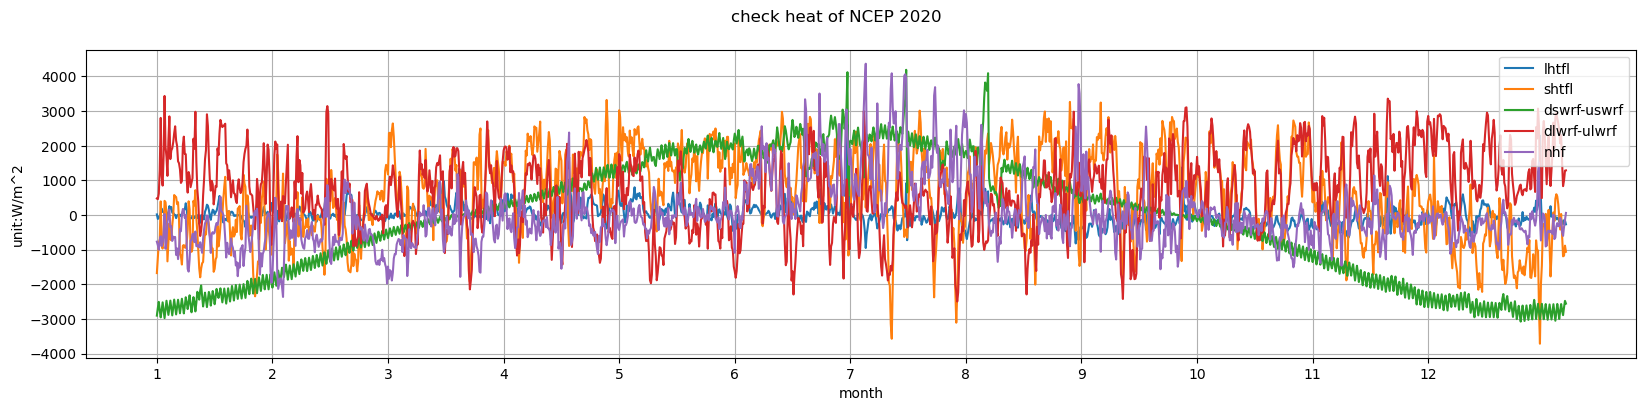

In [58]:
lhtfl = find(nc,'lhtfl')
nc_s = netCDF4.Dataset('C:/Users/ishid/Github/00_data/shtfl.sfc.gauss.2020.nc','r')
print(nc_s.variables['shtfl'])
shtfl = find(nc_s,'shtfl')
nc_ds = netCDF4.Dataset('C:/Users/ishid/Github/00_data/dswrf.sfc.gauss.2020.nc','r')
print(nc_ds.variables['dswrf'])
dswrf = find(nc_ds,'dswrf')
nc_dl = netCDF4.Dataset('C:/Users/ishid/Github/00_data/dlwrf.sfc.gauss.2020.nc','r')
dlwrf = find(nc_dl,'dlwrf')
nc_us = netCDF4.Dataset('C:/Users/ishid/Github/00_data/uswrf.sfc.gauss.2020.nc','r')
uswrf = find(nc_us,'uswrf')
nc_ul = netCDF4.Dataset('C:/Users/ishid/Github/00_data/ulwrf.sfc.gauss.2020.nc','r')
ulwrf = find(nc_ul,'ulwrf')
nhf = dswrf-uswrf+dlwrf-ulwrf-lhtfl-shtfl
fig = plt.figure(figsize=(20,4)) 
ax = fig.add_subplot(1,1,1,xlabel = 'month',ylabel='unit:W/m^2')
ax.plot(lhtfl,label = 'lhtfl');ax.plot(shtfl,label = 'shtfl');
ax.plot(dswrf-uswrf,label = 'dswrf-uswrf');ax.plot(dlwrf-ulwrf,label = 'dlwrf-ulwrf')
#ax.plot(uswrf,label = 'uswrf');ax.plot(ulwrf,label = 'ulwrf')
ax.plot(nhf,label = 'nhf')
fig.suptitle('check heat of NCEP 2020')
plt.xticks([4*30*i for i in range(12)], [i for i in range(1,13)])
ax.legend();plt.grid();plt.plot();plt.show()




# plot TSOBC

In [157]:
sdir = 'input_testcase_JST'
nc_ts = netCDF4.Dataset(f'C:/Users/ishid/fvcominputs/{sdir}/TokyoBay_tsobc.nc','r')
nc_ts.variables.keys()

dict_keys(['time', 'obc_nodes', 'obc_h', 'siglev', 'siglay', 'obc_temp', 'obc_salinity'])

In [158]:
nc_ts.variables['obc_temp']

<class 'netCDF4._netCDF4.Variable'>
float32 obc_temp(time, siglay, nobc)
    long_name: sea_water_temperature
    units: Celcius
    grid: obc_grid
unlimited dimensions: time
current shape = (8736, 30, 18)
filling on, default _FillValue of 9.969209968386869e+36 used

node number = 2721
l=3.0


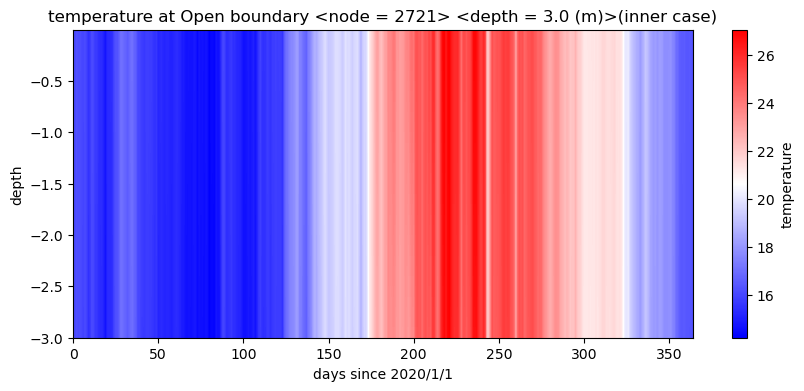

node number = 2748
l=6.980687


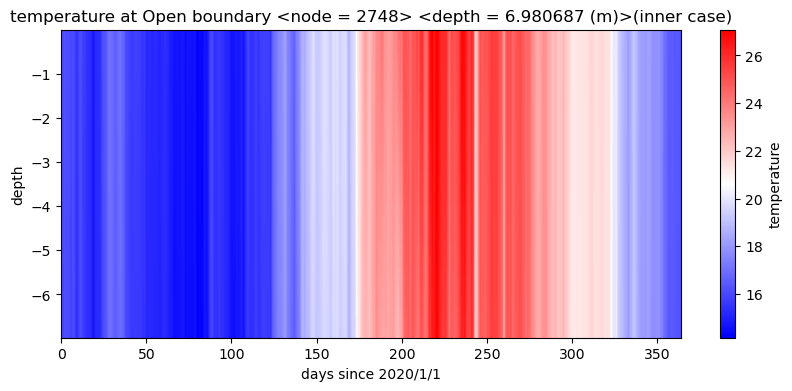

node number = 2772
l=9.639805


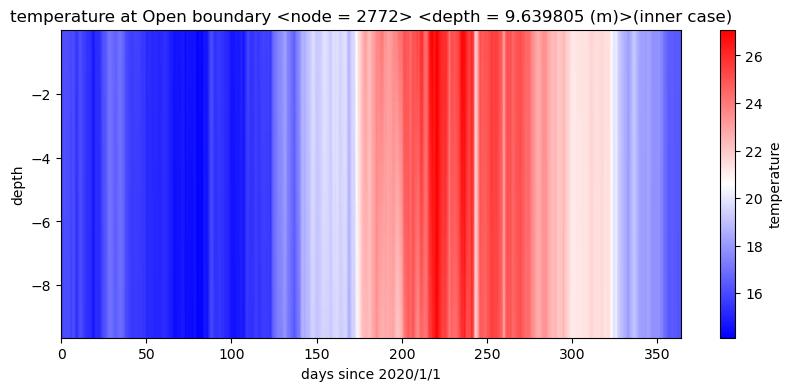

node number = 2791
l=14.865103


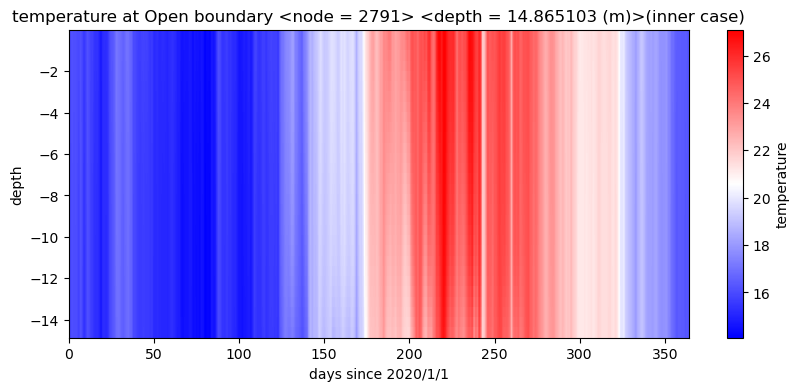

node number = 2809
l=22.709279


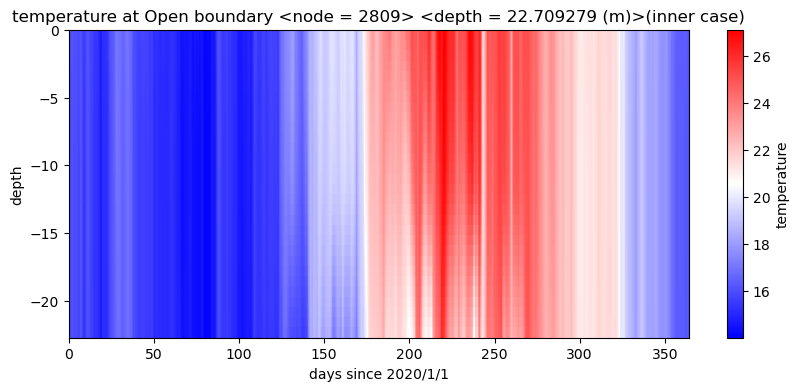

node number = 2825
l=31.997584


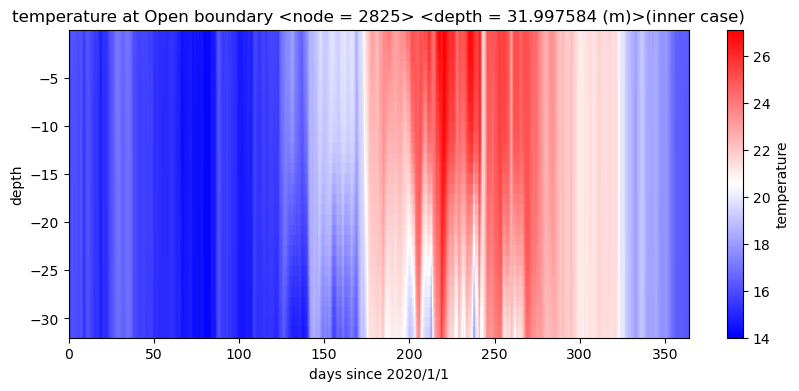

node number = 2847
l=42.638934


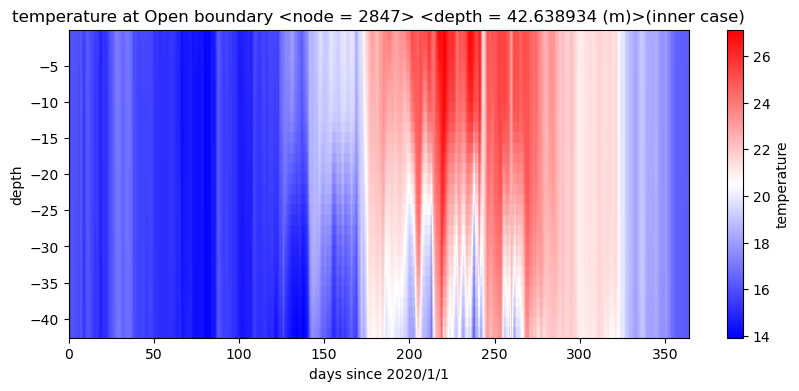

node number = 2866
l=54.459833


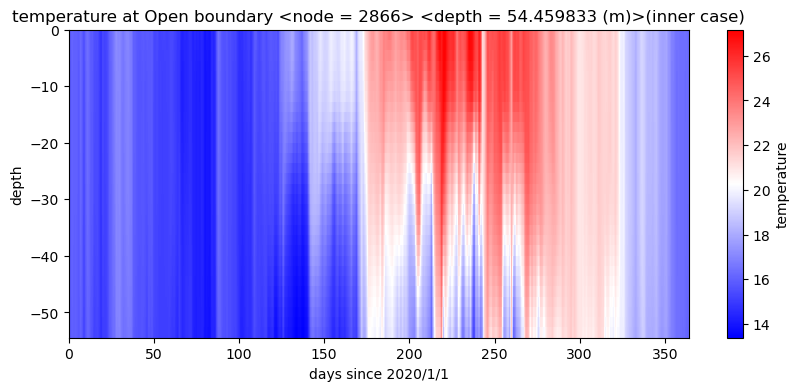

node number = 2884
l=63.845294


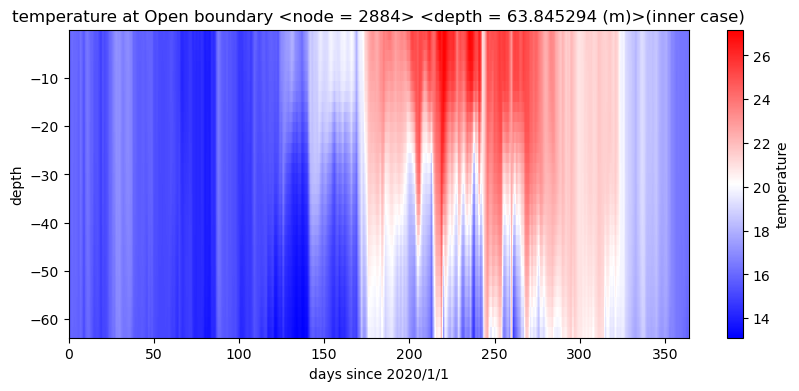

node number = 2899
l=68.10275


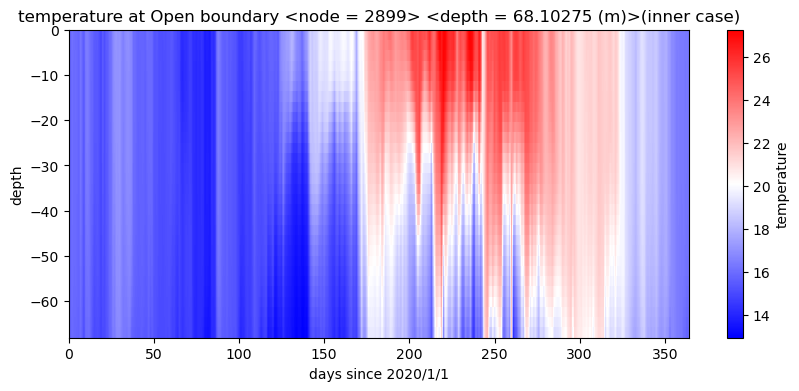

node number = 2910
l=57.463125


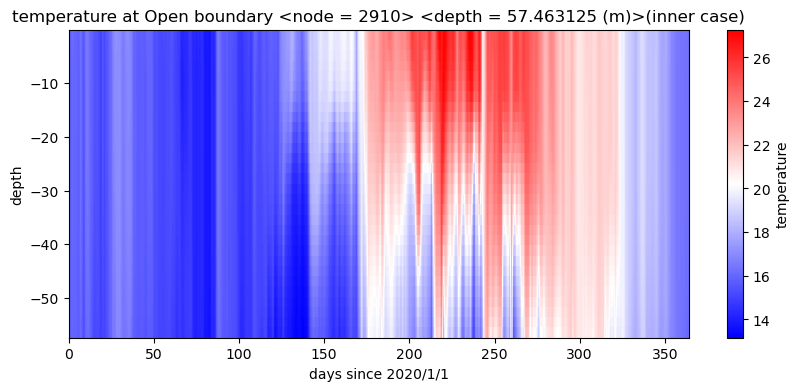

node number = 2918
l=35.048757


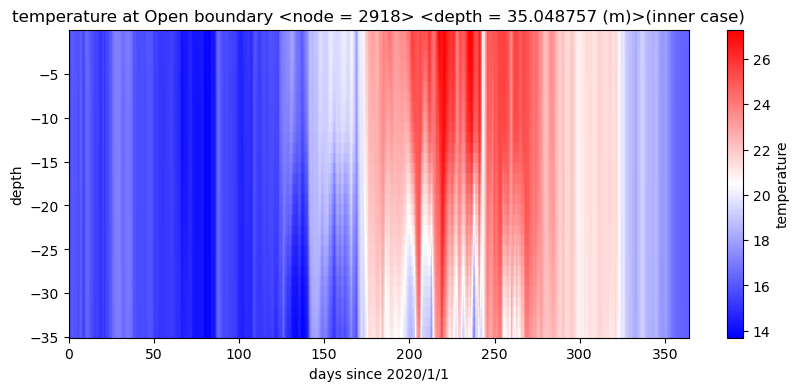

node number = 2925
l=28.174653


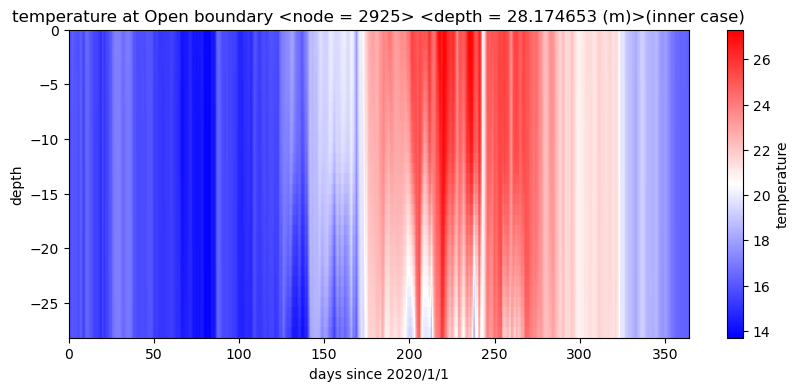

node number = 2931
l=22.915963


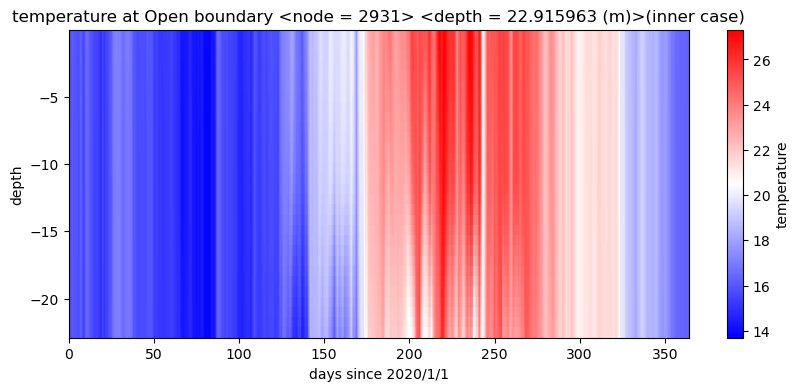

node number = 2937
l=16.278083


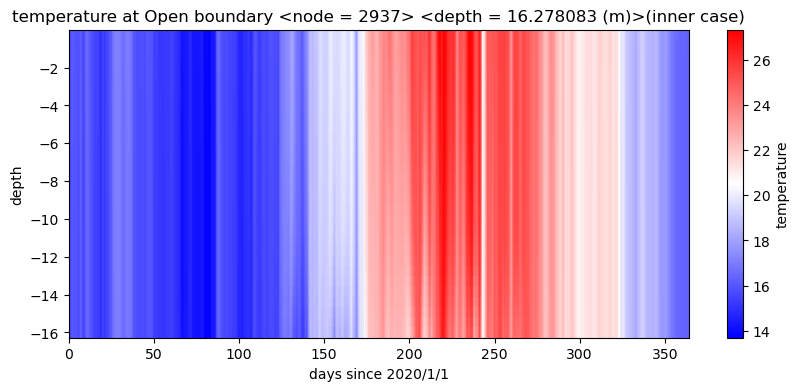

node number = 2942
l=12.307398


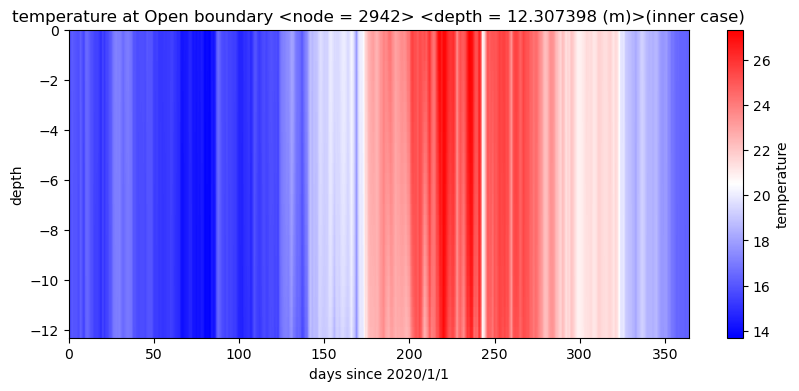

node number = 2946
l=9.628232


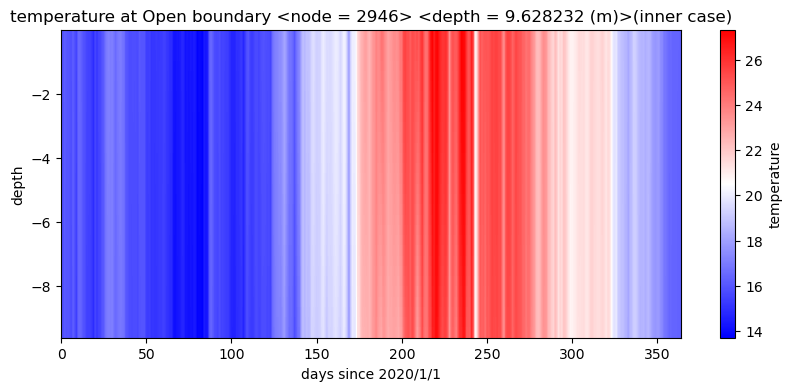

node number = 2948
l=5.653543


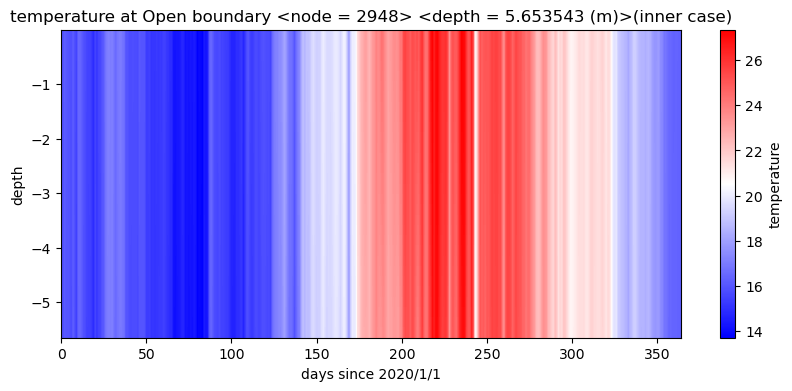

In [159]:
#settings
nnode = len(nc_ts.variables['obc_nodes'])
#node = 8

variable = 'temperature'

#set variable data
data = nc_ts.variables['obc_salinity'][:,:,:].data
if variable == 'temperature':
    data = nc_ts.variables['obc_temp'][:,:,:].data# shaoe of data must be (time,siglay,node(or nobc))
for node in range(nnode):
    #read depth
    nodeid = nc_ts.variables['obc_nodes'][node];print(f'node number = {nodeid}')
    with open(f'C:/Users/ishid/fvcominputs/{sdir}/TokyoBay_dep.dat','r') as f:
        L = f.readlines()
        depth = float(L[nodeid][29:])
        print(f'l={depth}')

    #make fig and ax
    fig,ax = plt.subplots(figsize=(10,4))
    #set coordinate
    t = nc_ts.variables['time'][:]-58849
    s = nc_ts.variables['siglay'][:,node] * depth
    Time,S = np.meshgrid(t,s)
    #make contour
    c = ax.pcolormesh(Time,S,(data[:,:,node]).T,cmap='bwr',shading='auto')
    fig.colorbar(c, ax=ax,label=f'{variable}')
    #set legend,show, and savefig
    ax.set_ylabel('depth');ax.set_xlabel('days since 2020/1/1');ax.set_title(f'{variable} at Open boundary <node = {nodeid}> <depth = {depth} (m)>(inner case)')
    os.makedirs(sdir,exist_ok=True)
    plt.show();fig.savefig(f'./{sdir}/inner_obc_{variable}_{nodeid}.png')



# plot forcing

['uwind_speed', 'vwind_speed', 'air_temperature', 'cloud_cover', 'short_wave', 'long_wave', 'relative_humidity', 'air_pressure', 'Precipitation']


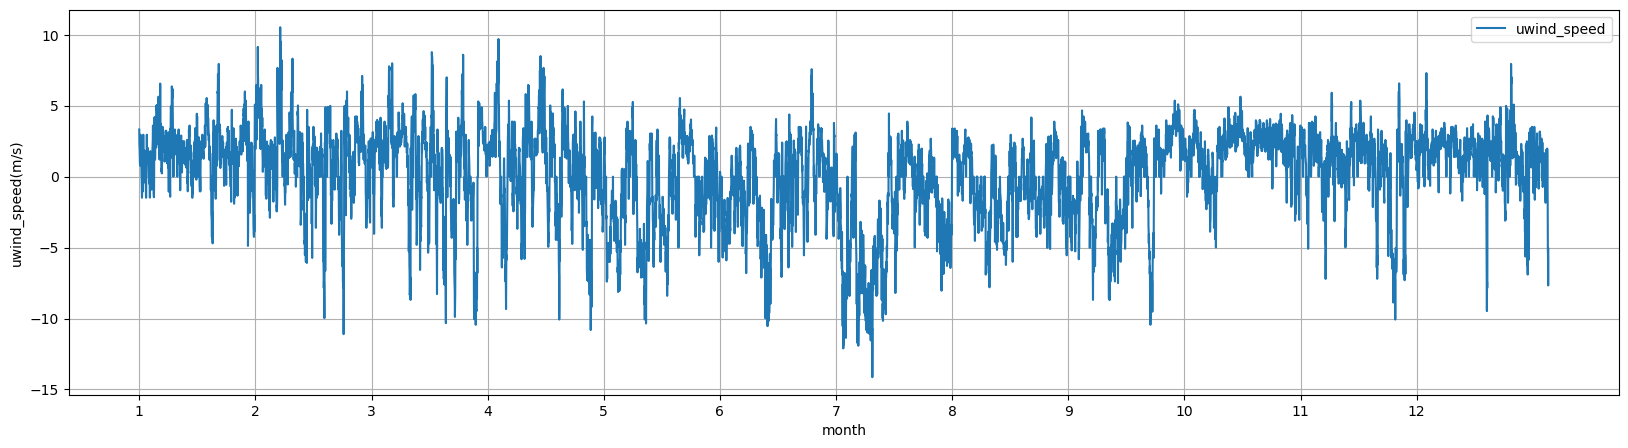

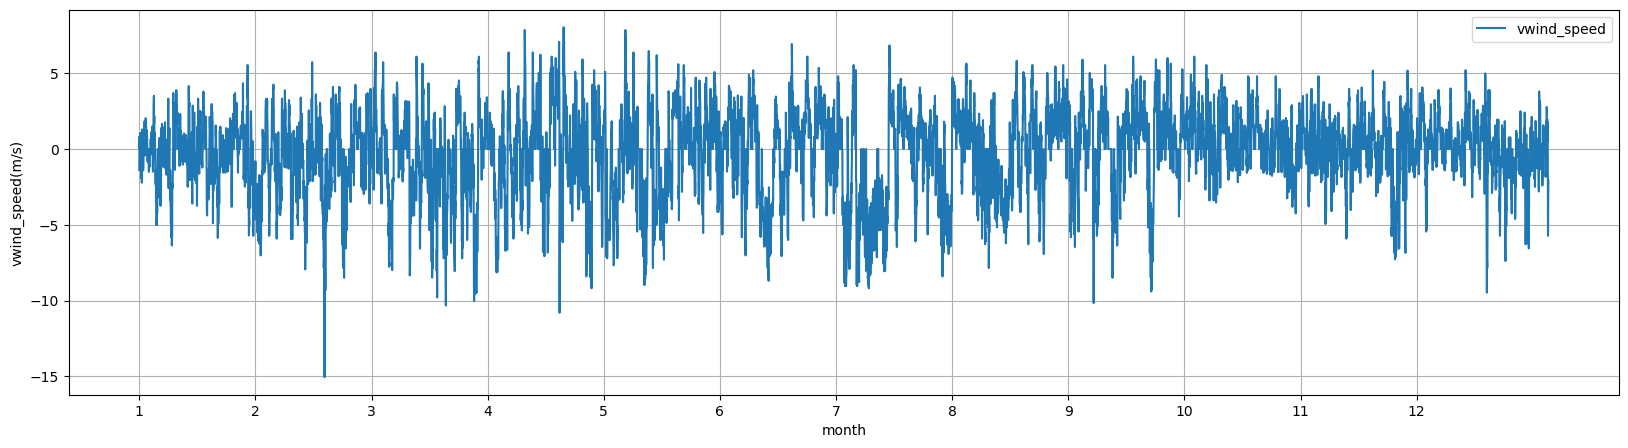

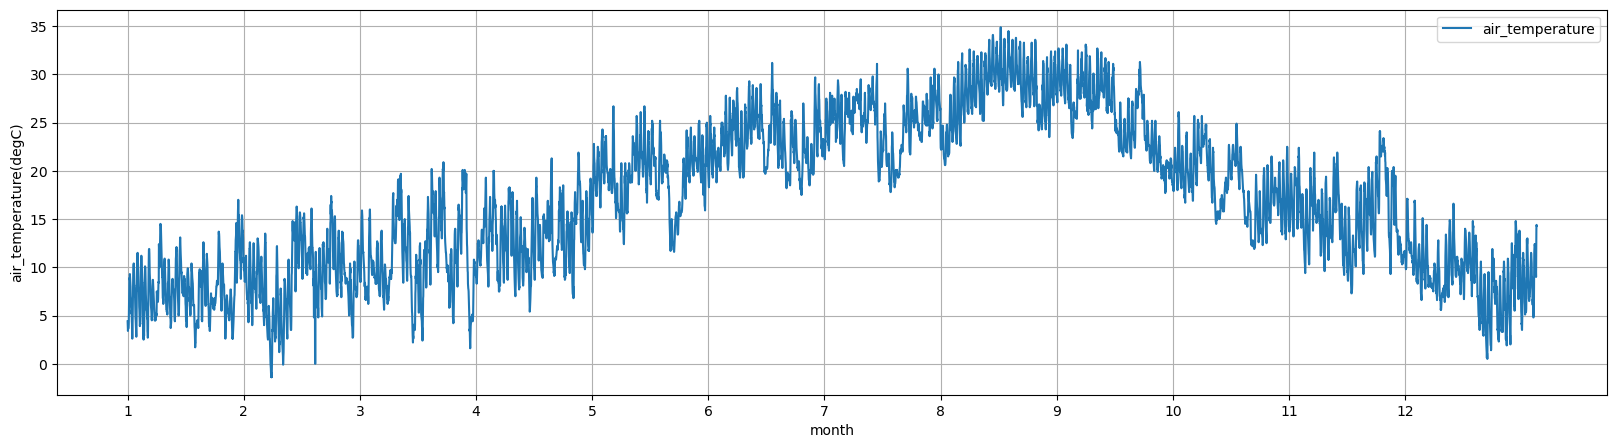

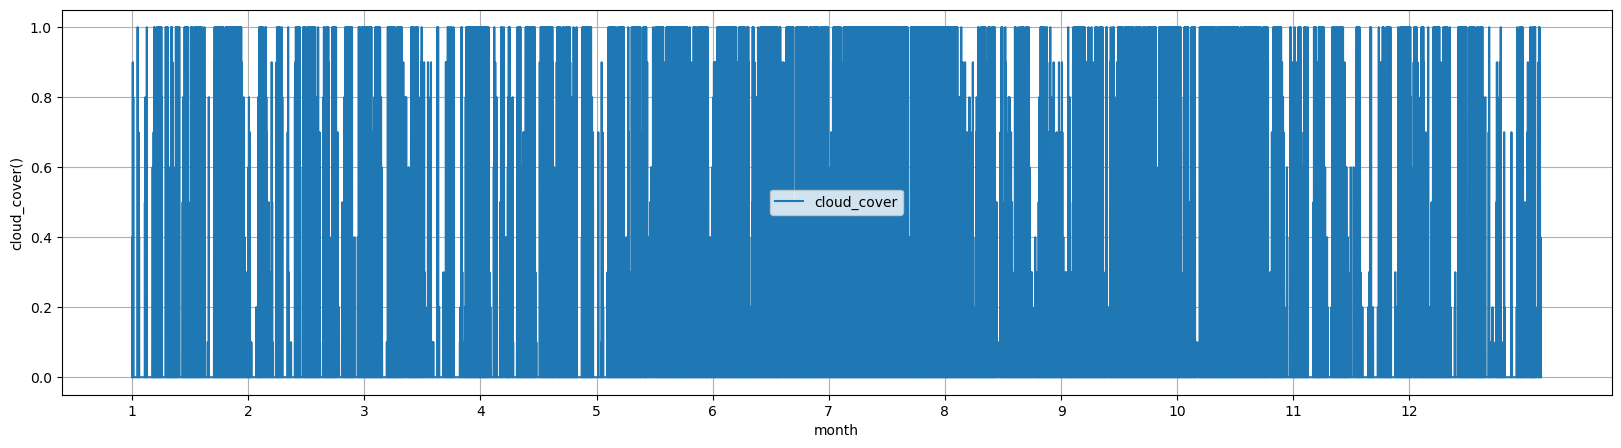

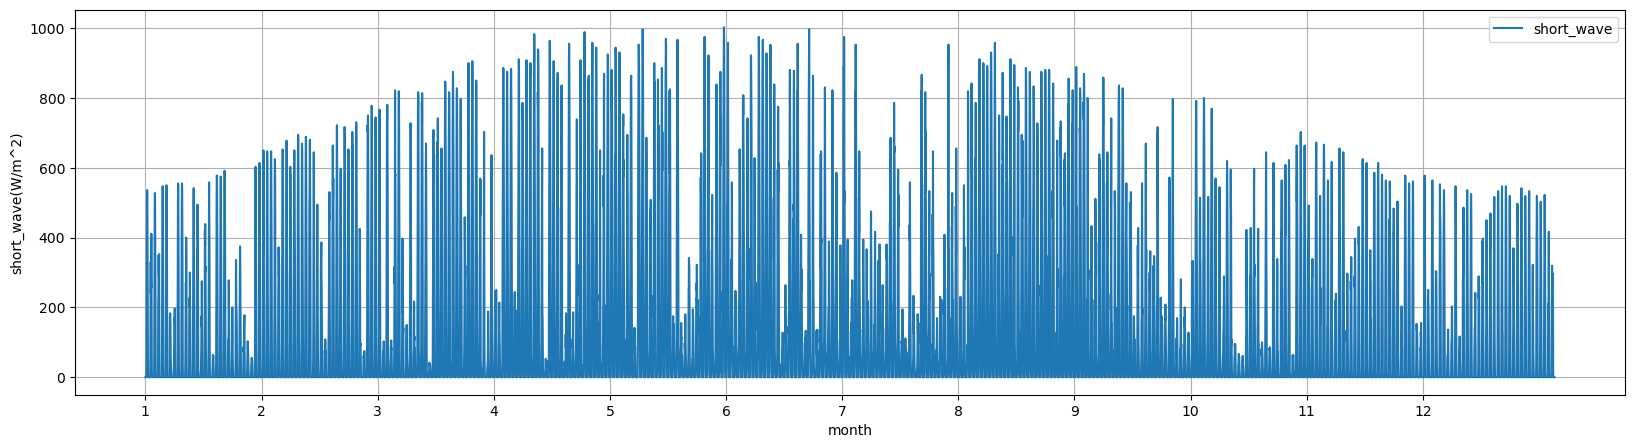

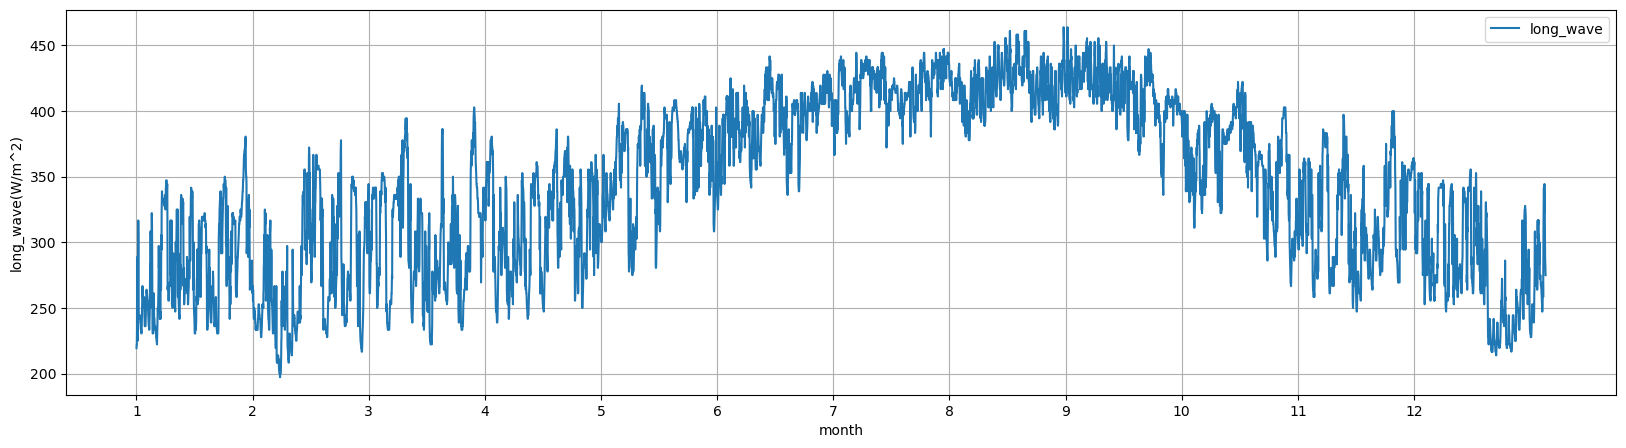

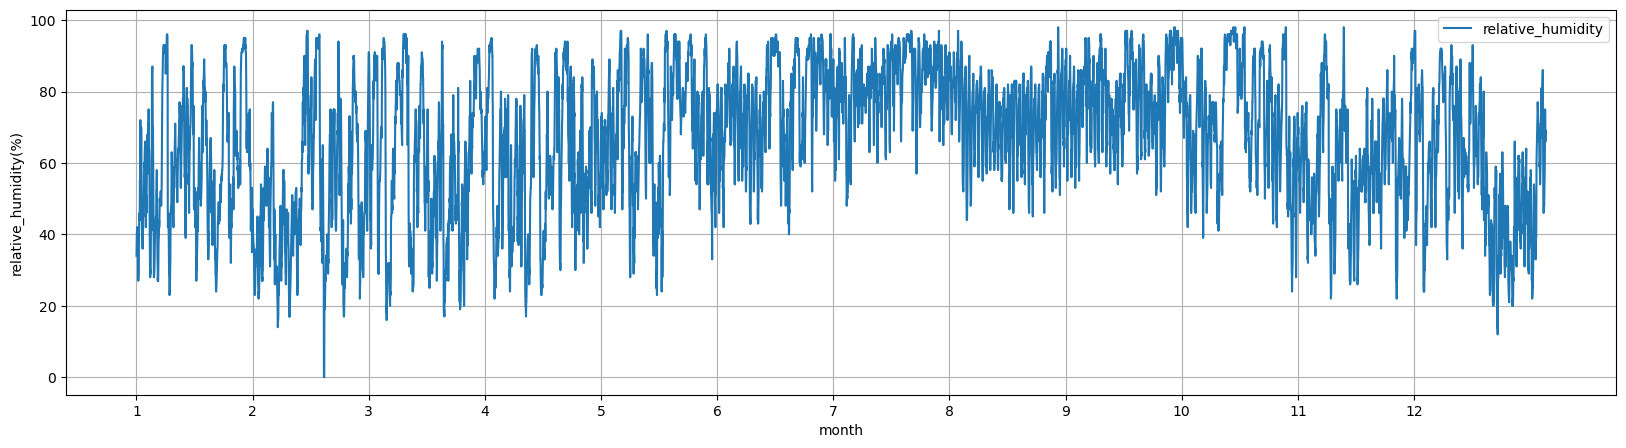

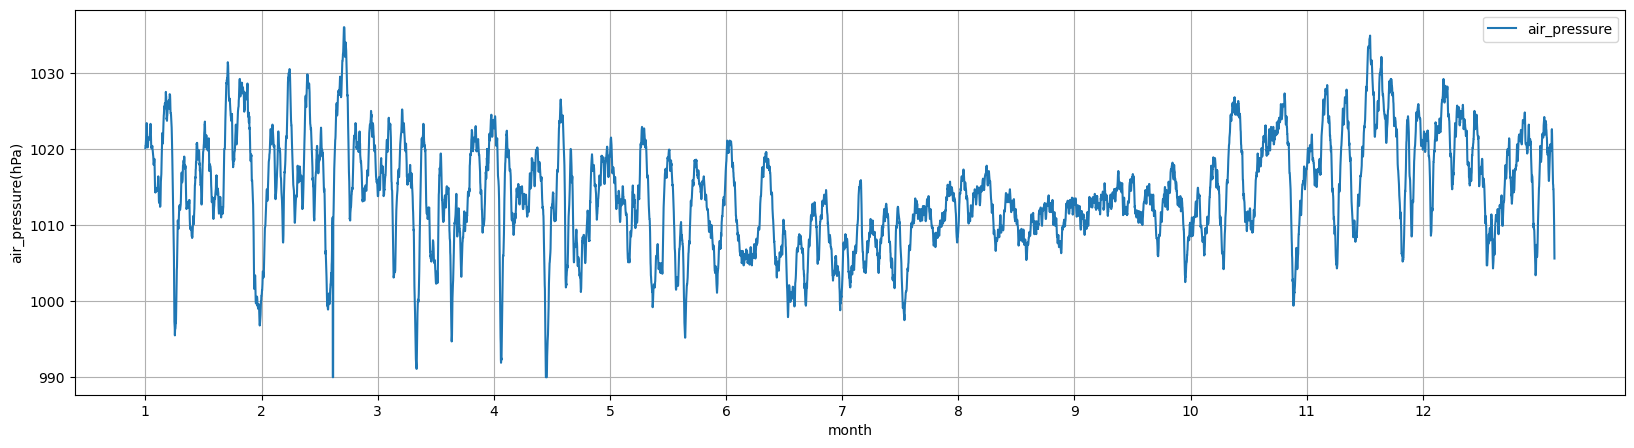

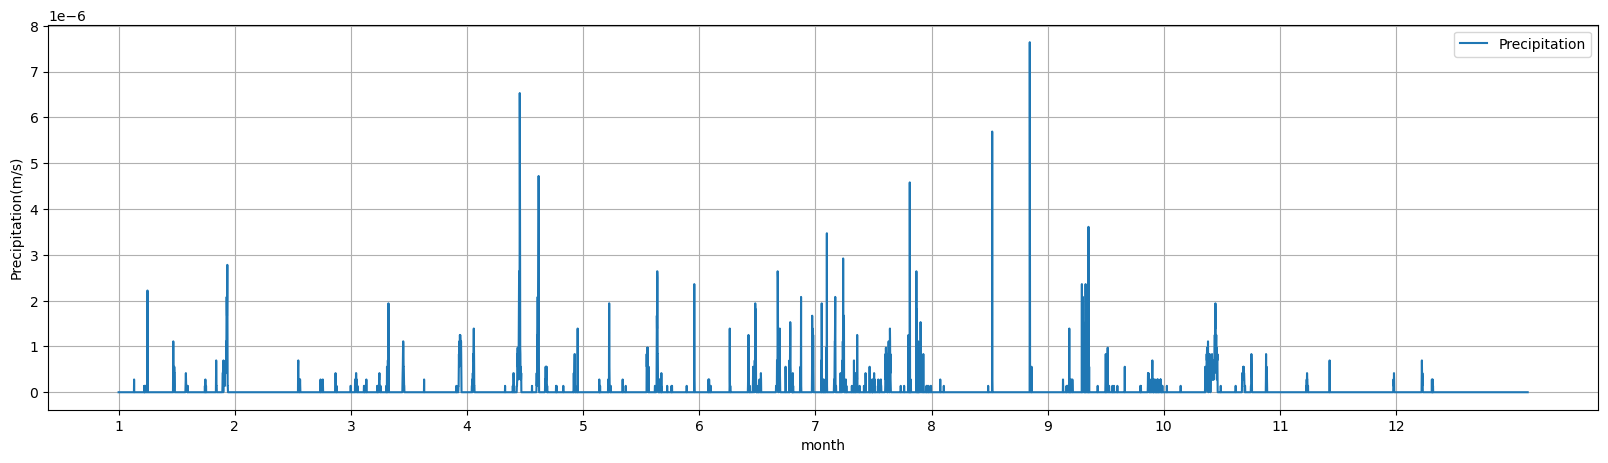

In [124]:
nc_gwo = netCDF4.Dataset('C:/Users/ishid/fvcominputs/input_inner_slp/TokyoBay_wnd.nc','r')
nc_gwo.variables.keys()
units = ['m/s','m/s','degC','','W/m^2','W/m^2','%','hPa','m/s','W/m^2',]
plotlist=list(nc_gwo.variables.keys())
plotlist=plotlist[10:]
print(plotlist)
for key,unit in zip(plotlist,units):
    fig = plt.figure(figsize=(20,5)) 
    ax = fig.add_subplot(1,1,1,xlabel = 'month',ylabel=key+'('+unit+')')

    ax.plot(nc_gwo.variables[key][:,10].data,label = key)
    plt.xticks([24*30*i for i in range(12)], [i for i in range(1,13)])
    ax.legend();plt.grid();plt.plot();plt.show()
    fig.savefig('./'+key+'.png')

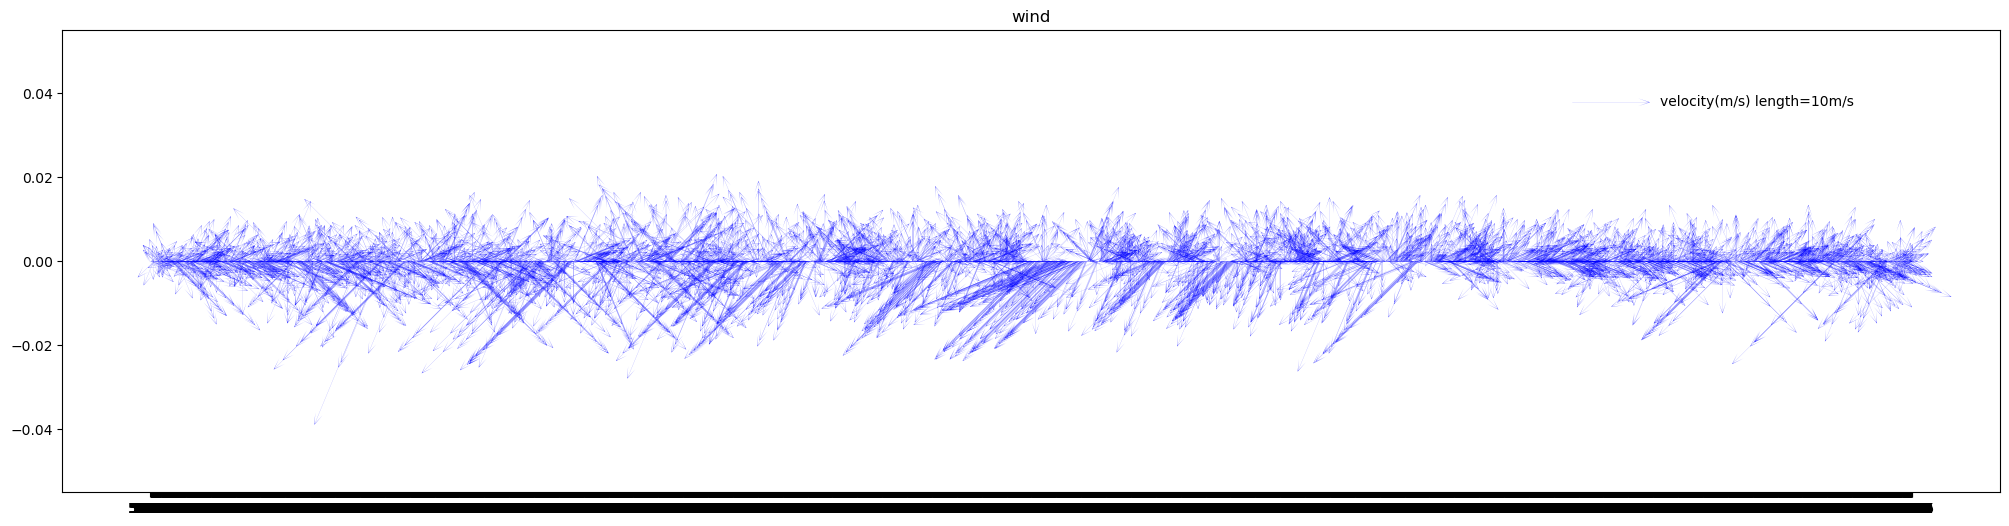

In [121]:
#plot wind magnitude
from jdcal import gcal2jd, jd2gcal ,MJD_0
from matplotlib import dates as mdates
import datetime
nc_gwo = netCDF4.Dataset('C:/Users/ishid/fvcominputs/input_inner_JST/TokyoBay_wnd.nc','r')
uwnd = nc_gwo.variables['uwind_speed'][:,10]
vwnd = nc_gwo.variables['vwind_speed'][:,10]
fig,ax = plt.subplots(figsize=(25,6))
ax.set_title('wind')
#x = nc_gwo.variables['time'][:]
x = range(58849,58849+(len(nc_gwo.variables['time'][:])))
y = [0]
X,Y = np.meshgrid(x,y)

Q = ax.quiver(X,Y,uwnd,vwnd,scale=250,color='blue',width=0.00004,headwidth=100,headlength=150,headaxislength=10)
ax.quiverkey(Q, 0.76, 0.76, 10, 'velocity(m/s) length=10m/s',coordinates='figure',labelpos='E')

#labels=[datetime.datetime(jd2gcal(MJD_0,time)[0],jd2gcal(MJD_0,time)[1],jd2gcal(MJD_0,time)[2])
#                       for time in nc_gwo.variables['time']]#[::300]
#plt.xticks(x)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.show()
fig.savefig('wind_quiver.png')

In [74]:
nc_mnflow = netCDF4.Dataset('C:/Users/ishid/fvcominputs/input/TokyoBay_mfobc.nc','r')
nc_mnflow.variables.keys()

dict_keys(['time', 'Itime', 'Itime2', 'I_MFCELL_GL', 'MFDIST', 'DMFQDIS'])

In [80]:
print(nc_mnflow['MFDIST'][1,:])
print(nc_mnflow['DMFQDIS'][:,1])
print(nc_mnflow['DMFQDIS'])
#print(nc_mnflow['I_MFCELL_GL'][:])


[0.03333334 0.03333334 0.03333334 0.03333334 0.03333334 0.03333334
 0.03333334 0.03333334 0.03333334 0.03333334 0.03333334 0.03333334
 0.03333334 0.03333334 0.03333334 0.03333334 0.03333334 0.03333334
 0.03333334 0.03333334 0.03333334 0.03333334 0.03333334 0.03333334
 0.03333334 0.03333334 0.03333334 0.03333334 0.03333334 0.03333334]
[0.38376656 0.374534   0.36544305 0.35650602 0.34773636 0.3391486
 0.3307584  0.32258242 0.31463838 0.30694464 0.29952022 0.29238433
 0.28555602 0.27905384 0.2728953  0.26709658 0.2616721  0.25663438
 0.2519938  0.24775867 0.24393532 0.24052821 0.23754026 0.23497315]
<class 'netCDF4._netCDF4.Variable'>
float32 DMFQDIS(time, nmfcell)
    long_name: open boundary mean flow flux
    units: m^3/s
    grid: obc_grid
    type: data
unlimited dimensions: time
current shape = (24, 47)
filling on, default _FillValue of 9.969209968386869e+36 used


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


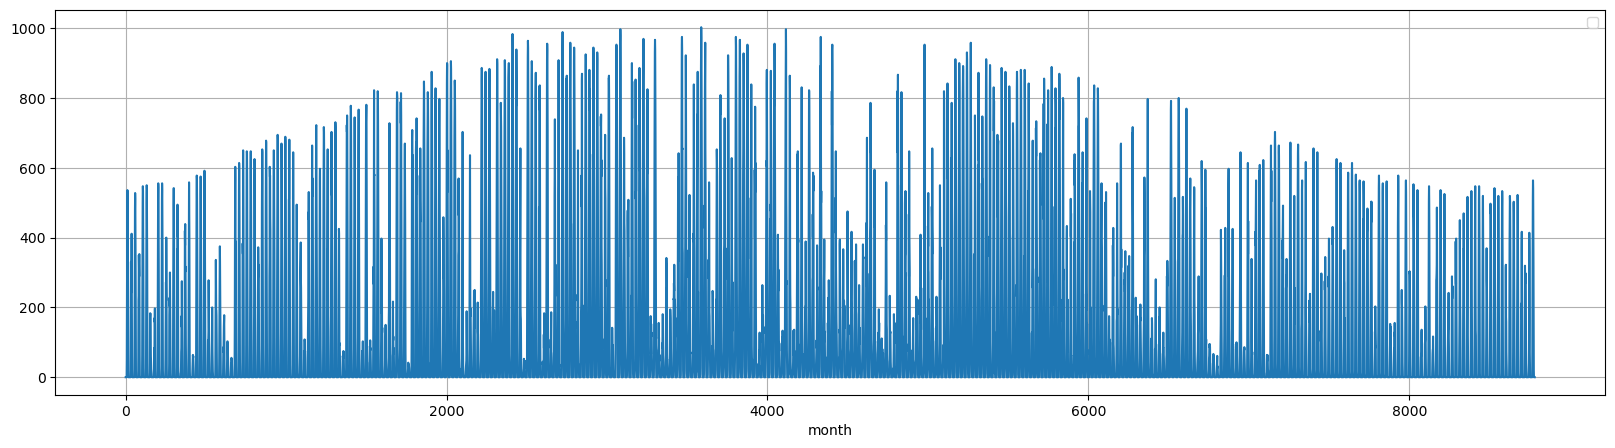

In [7]:
nc = netCDF4.Dataset('C:/Users/ishid/Github/00_data/GWO_data/Tokyo_2020_dswrf.nc')
dsw = nc.variables['dsw'][:,0,0]
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(1,1,1,xlabel = 'month')

ax.plot(dsw)
#plt.xticks([24*30*i for i in range(12)], [i for i in range(1,13)])
ax.legend();plt.grid();plt.plot();plt.show()
 #   fig.savefig('./'+key+'.png')
    

In [98]:
nc.close()

<AxesSubplot: >

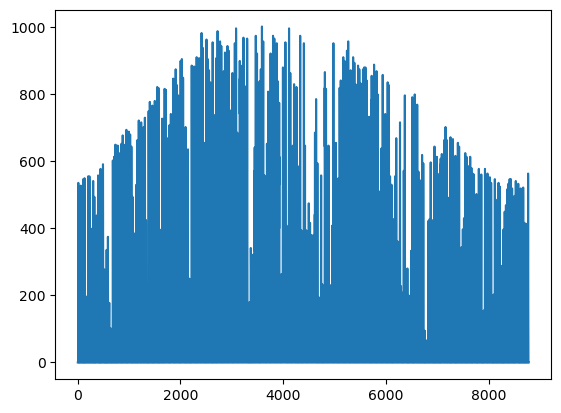

In [93]:
df = pd.read_csv("C:/Users/ishid/Github/datatools-main/gwo/scr/Tokyo_2020_dswr.csv")
df['dswr'].plot()

# plot tide

In [129]:
nc = netCDF4.Dataset('C:/Users/ishid/fvcominputs/input_inner_JST/TokyoBay_julian_obc.nc','r')
nc.variables.keys()

dict_keys(['obc_nodes', 'time', 'elevation'])

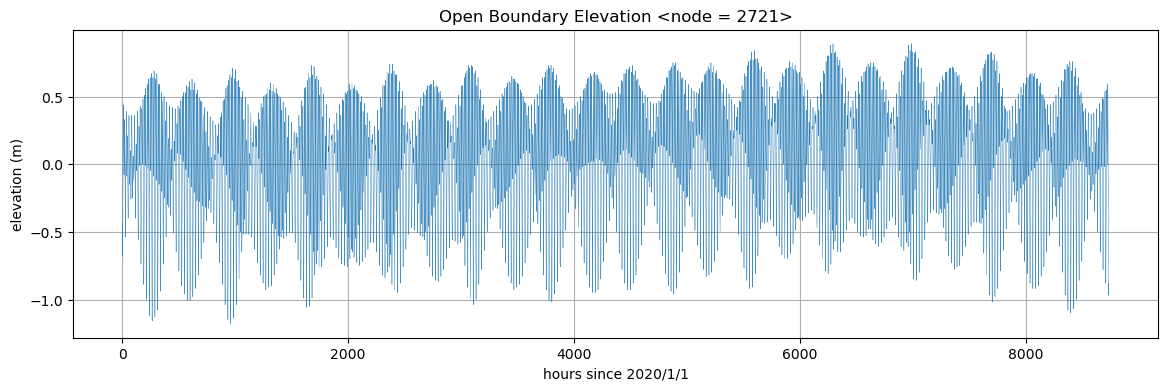

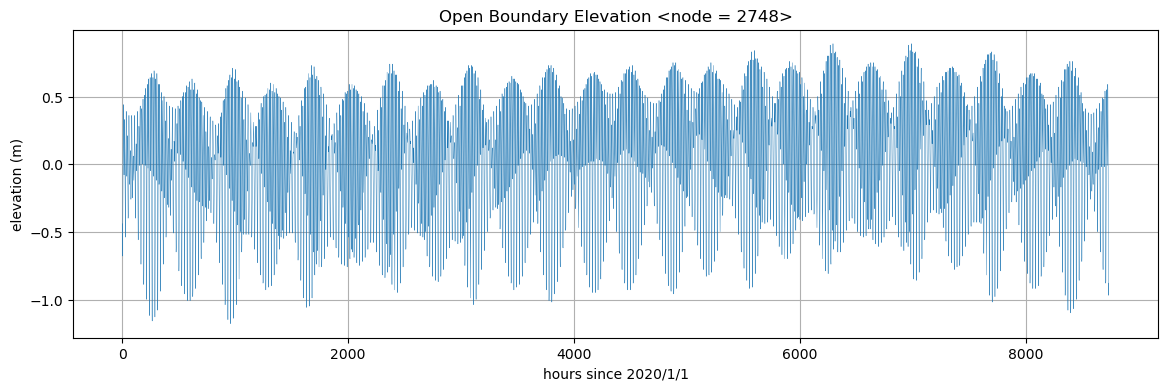

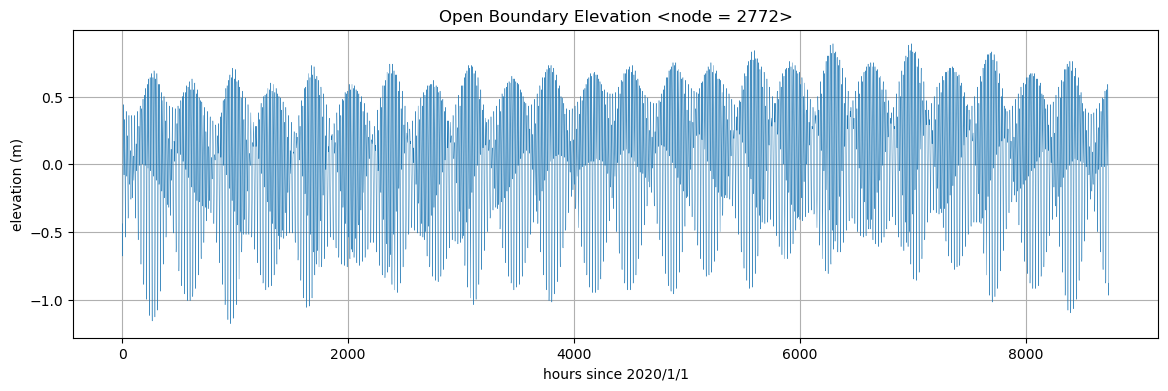

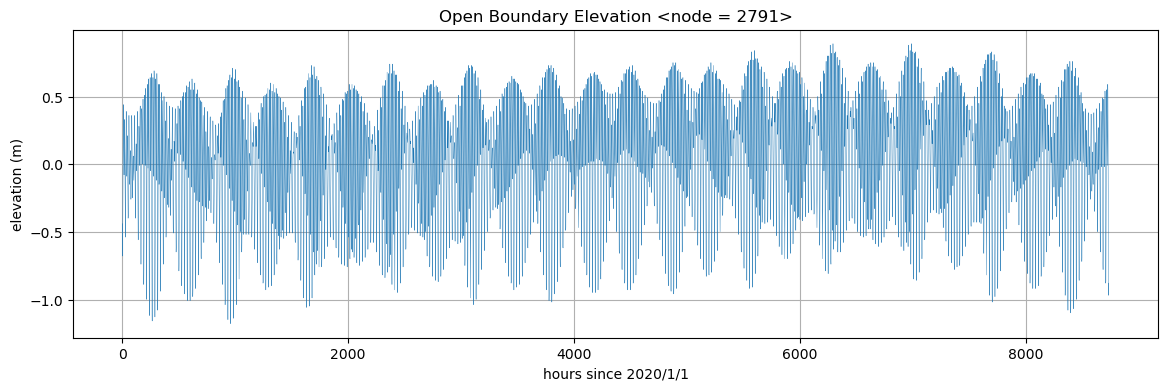

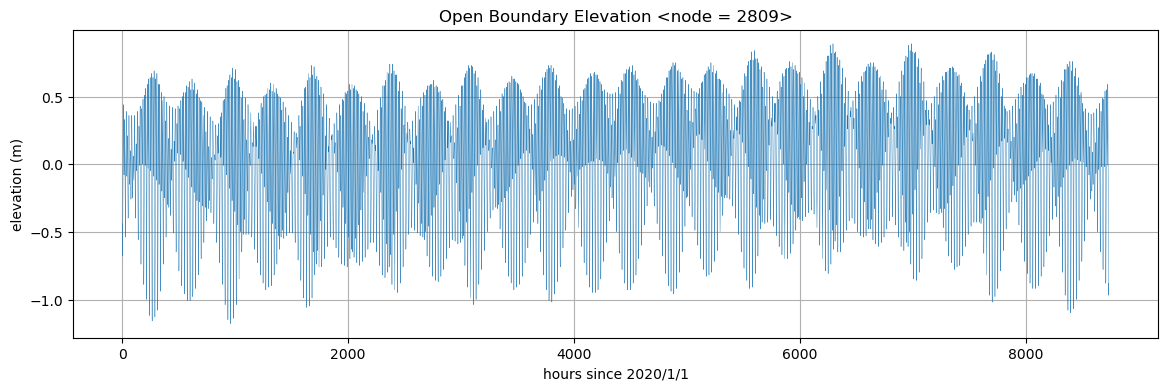

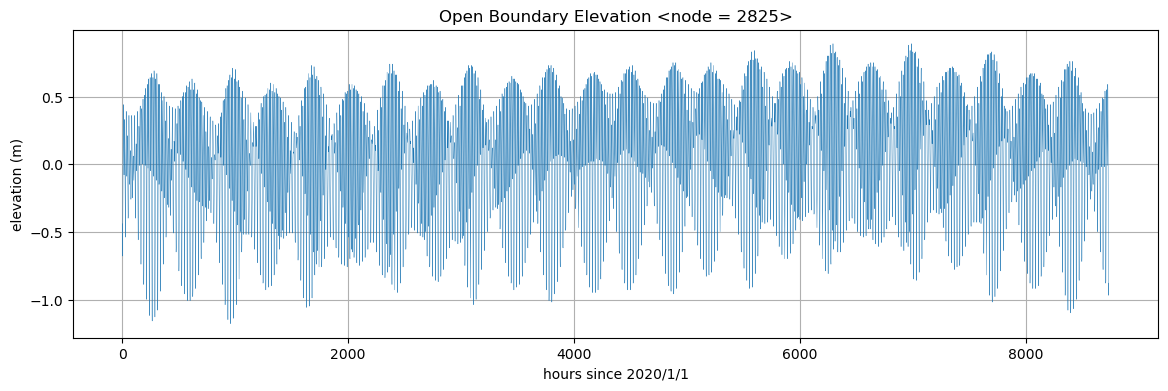

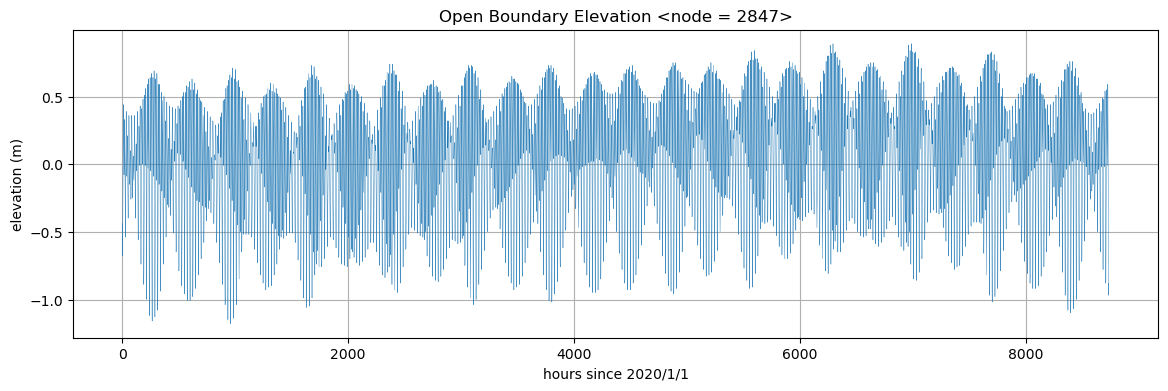

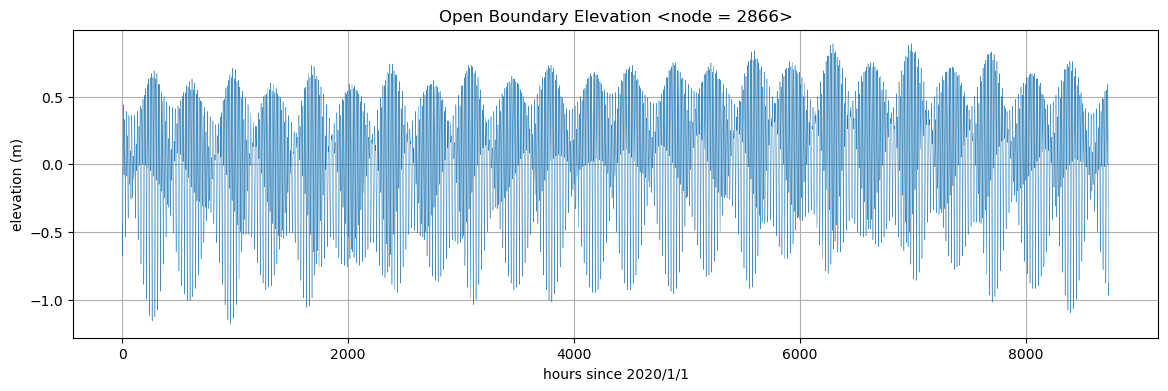

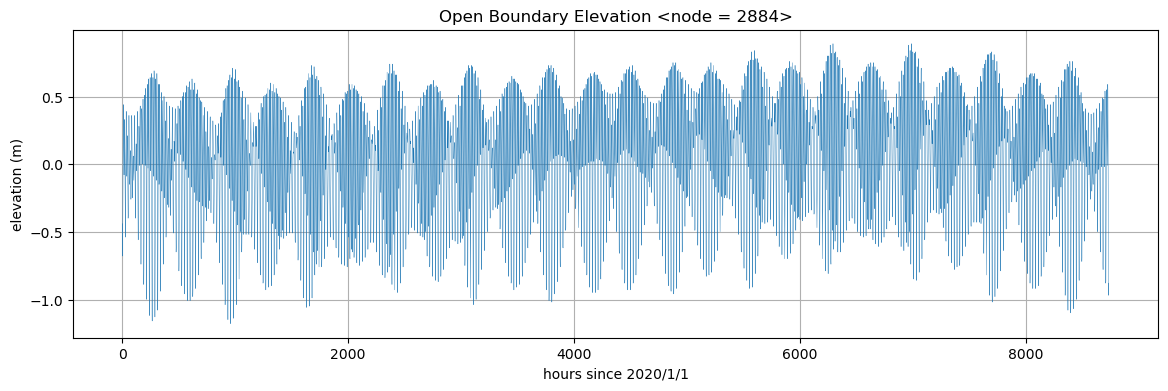

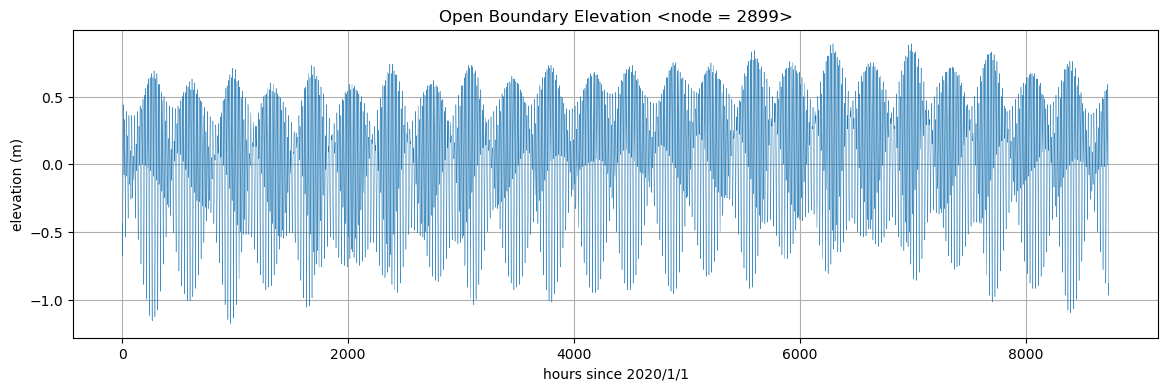

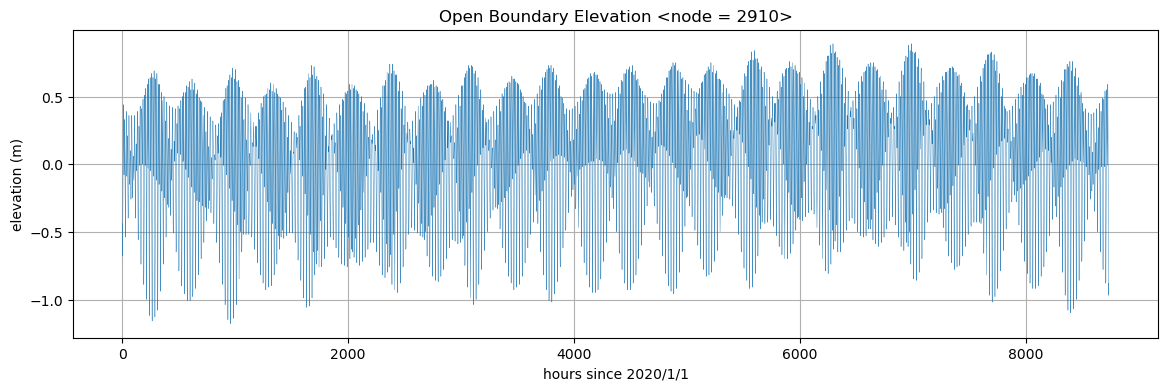

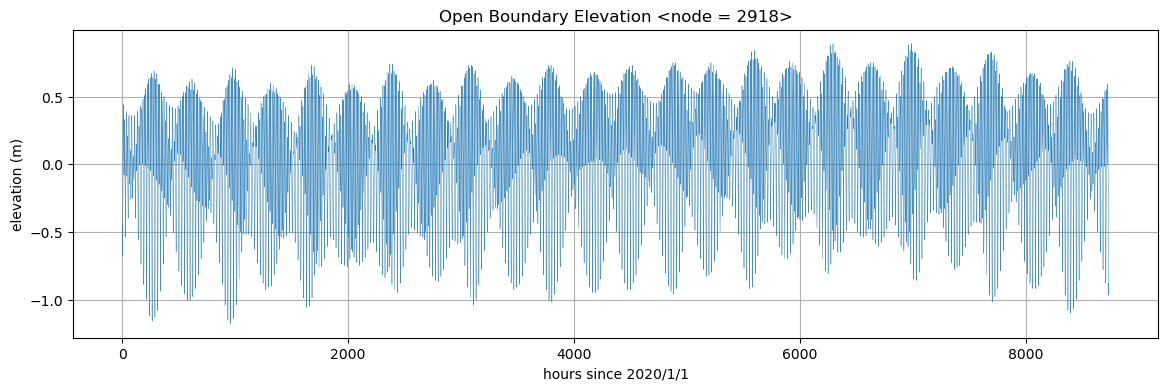

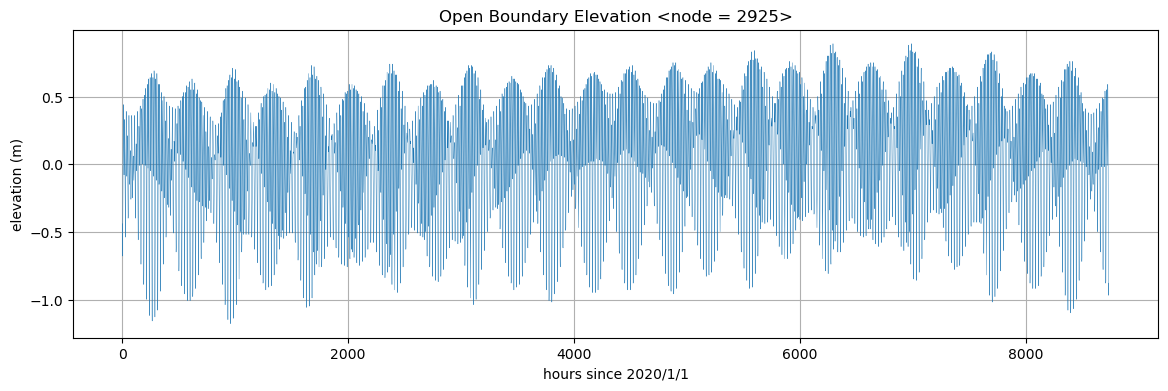

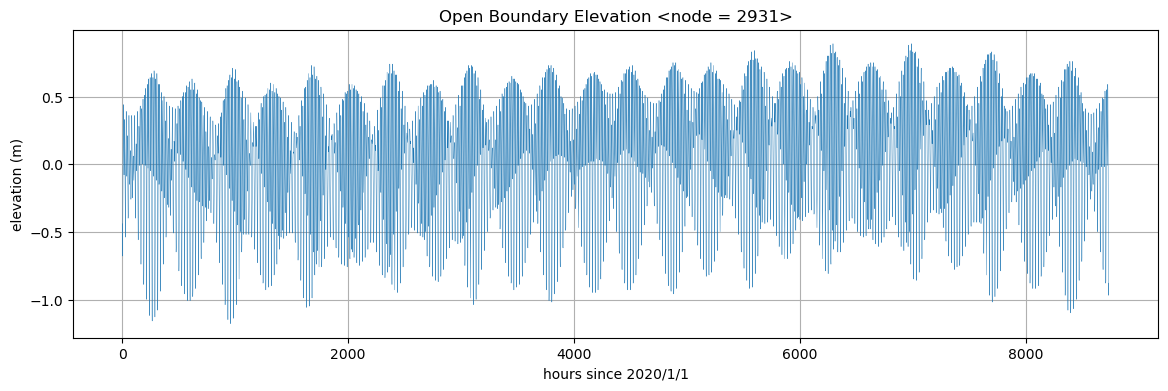

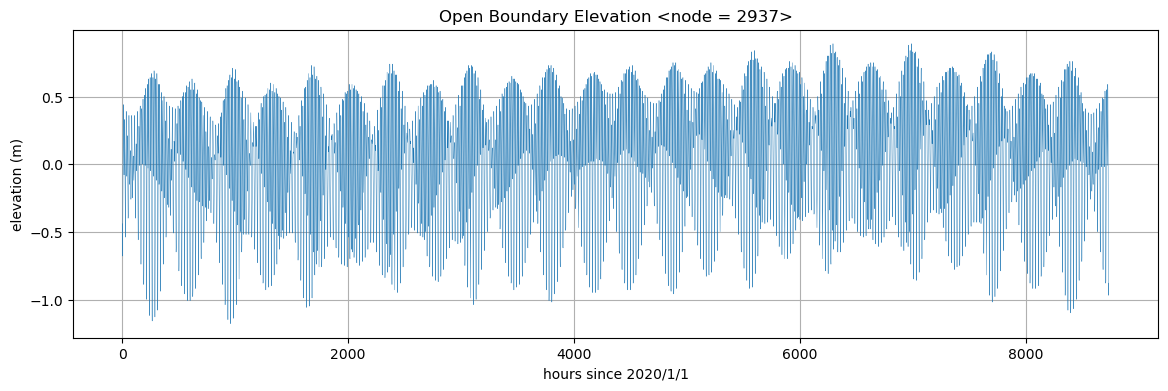

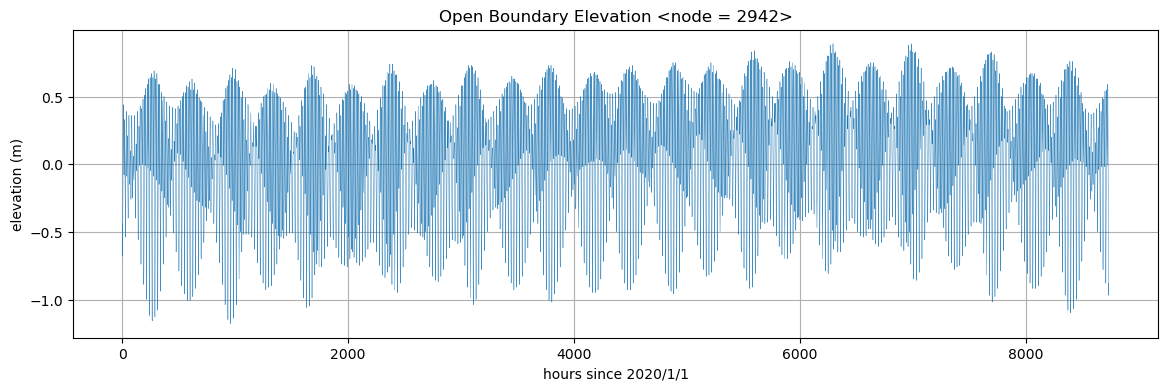

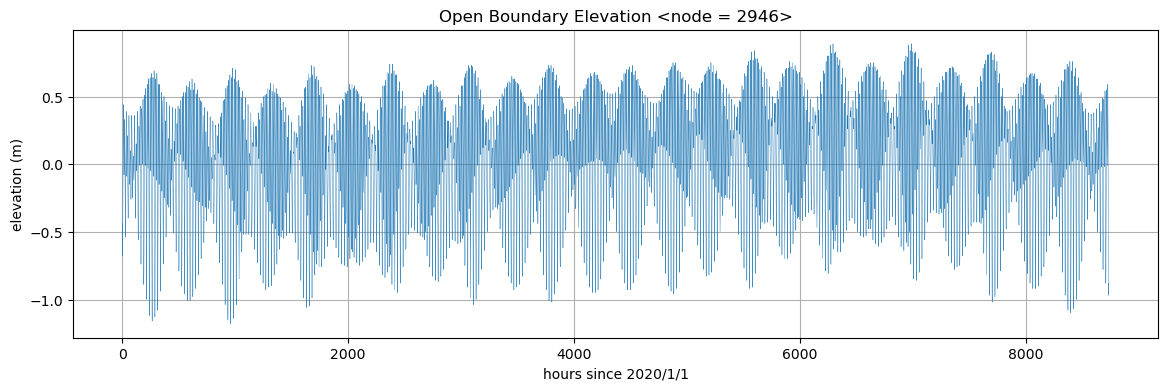

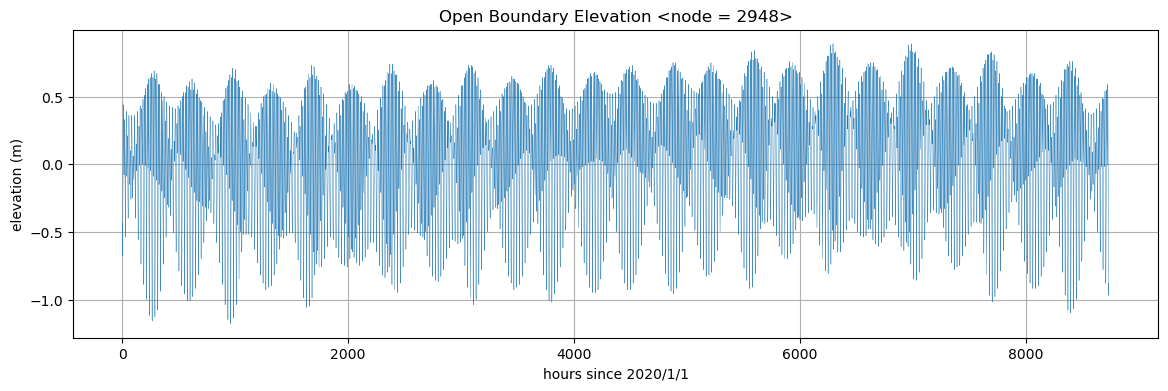

In [138]:
nnode = len(nc.variables['obc_nodes'][:])
for node in range(nnode):
    nodeid = nc.variables['obc_nodes'][node]

    fig,ax = plt.subplots(figsize=(14,4))
    ax.plot(nc.variables['elevation'][:,node],linewidth=0.3)

    #set legend
    ax.set_ylabel('elevation (m)');ax.set_xlabel('hours since 2020/1/1');ax.set_title(f'Open Boundary Elevation <node = {nodeid}>')
    ax.grid();plt.show();fig.savefig(f'./tide/obc_elevation_{nodeid}.png')